## Data Modeling

The final dataset with imputed values was used to compute the classification model and calculated feature importance was used to identify the micronutrients that were contributing more to the model. 

Data modeling was done with Decision Tree and Random forest algorithms with hyperparameter tuning using Gridsearch. Feature importance was computed using two different methods: scikit-learn's permutation based method and the in-built Random forest feature importance method.

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [16]:
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
NHANES_final_df = pd.read_excel('NHANES_final.xlsx', engine='openpyxl')

In [18]:
NHANES_final_df.head()

,Unnamed: 0,ID,Gender,Age(Months),Race,PregnStat,White_Cell_num,Lymphocyte(%),SegNeutrophil(%),Lymphocyte_num,...,VitB12(pmol/L),VitB6,VitD2,VitD3,VitD(nmol/L),VitC(umol/L),VitE(umol/L),VitA(umol/L),Weight,BMI
0,0,62161,1,264,3,2,5.1,27.0,60.1,1.4,...,433.773755,67.521150,2.663838,63.171397,62.501099,55.031690,23.094371,1.934913,78.806135,25.278573
1,1,62162,2,36,1,2,17.6,55.5,36.9,9.8,...,305.638010,58.298489,2.663838,57.910763,58.088403,56.746678,25.721783,1.879215,15.315418,19.184786
2,2,62163,1,168,5,2,5.1,44.9,36.1,2.3,...,491.752859,64.087567,2.663838,58.859214,57.674557,56.740853,24.347905,1.735641,54.541704,20.749270
3,3,62164,2,528,3,2,5.6,27.2,58.7,1.5,...,412.708814,67.782671,3.304100,65.194235,62.029226,56.558531,27.660877,1.885412,73.885622,27.443223
4,4,62165,2,168,4,2,7.5,34.8,54.3,2.6,...,465.521054,54.961042,2.663838,54.836202,52.331585,57.978798,21.237162,1.598063,66.977157,26.189044


In [19]:
pip install numpy==1.19.5

Note: you may need to restart the kernel to use updated packages.


In [20]:
print(np.__version__)

1.19.2


In [21]:
NHANES_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82741 entries, 0 to 82740
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            82741 non-null  int64  
 1   ID                    82741 non-null  int64  
 2   Gender                82741 non-null  int64  
 3   Age(Months)           82741 non-null  int64  
 4   Race                  82741 non-null  int64  
 5   PregnStat             82741 non-null  int64  
 6   White_Cell_num        82741 non-null  float64
 7   Lymphocyte(%)         82741 non-null  float64
 8   SegNeutrophil(%)      82741 non-null  float64
 9   Lymphocyte_num        82741 non-null  float64
 10  SegNeutrophil_num     82741 non-null  float64
 11  HIV                   82741 non-null  int64  
 12  alco_dks_daily#       82741 non-null  int64  
 13  smokescigs_daily#     82741 non-null  int64  
 14  had_anemia_treatment  82741 non-null  int64  
 15  had_cancer         

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [22]:
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from io import StringIO  
from IPython.display import Image  


In [23]:
from sklearn.inspection import permutation_importance

## Decision Tree Model 1: Entropy model - no max_depth

The first decision tree model uses entropy and no limit on maximum depth. 

### Selection of features for modeling

The first two columns containing row index and ID were droped. The columns containing white blood cell counts and their concentration (white blood cell num, Lymphocytes and Neutrophils) that were used for labeling the data set according to immunity strength were droped. 

In [24]:
#split data for training and testing

X = NHANES_final_df[['Gender',
        'Age(Months)',
        'Race',
        'PregnStat',
        'HIV',
        'alco_dks_daily#',
        'smokescigs_daily#',
        'had_anemia_treatment',
        'had_cancer',
        'Cu(umol/L)',
        'Se(umol/L)',
        'Zn(umol/L)',
        'Fe(ug/L)',
        'Folate(nmol/L)',
        'VitB12(pmol/L)',
        'VitB6',
        'VitD2',
        'VitD3',
        'VitD(nmol/L)',
        'VitC(umol/L)',
        'VitE(umol/L)',
        'VitA(umol/L)',
        'Weight',
        'BMI']]

y = NHANES_final_df['immunity_strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Check the unique values in the 'immunity_strength' column

In [25]:
NHANES_final_df['immunity_strength'].unique()

array([2, 1])

`1` is low immunity and `2` is high immunity 



Fit the Decision Tree Classifier 

In [26]:
# entropy DecisionTreeClassifier. 
entr_model = tree.DecisionTreeClassifier(criterion="entropy", random_state = 1234)


entr_model.fit(X_train, y_train)

y_pred = entr_model.predict(X_test)
y_pred = pd.Series(y_pred)
entr_model

DecisionTreeClassifier(criterion='entropy', random_state=1234)

Calculate model metrics

In [27]:
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "1"' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Precision score for "2"' , metrics.precision_score(y_test,y_pred, pos_label = 2))
print('Recall score for "1"' , metrics.recall_score(y_test,y_pred, pos_label = 1))
print('Recall score for "2"' , metrics.recall_score(y_test,y_pred, pos_label = 2))

Model Entropy - no max depth
Accuracy: 0.8947750070499134
Balanced accuracy: 0.8881924971149796
Precision score for "1" 0.9159489736450172
Precision score for "2" 0.8599147121535181
Recall score for "1" 0.9150009703085581
Recall score for "2" 0.8613840239214011


 The accuracy of this model is fairly high and the recall and precision scores are in the upper range.

Feature importance was computed with scikit-learn Permutation importance method

Text(0.5, 0, 'Permutation Importance')

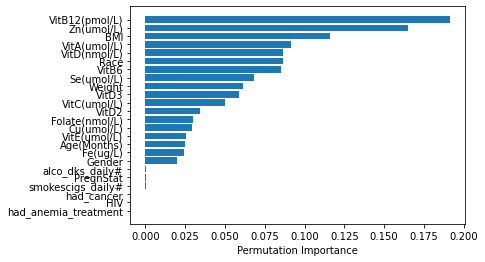

In [28]:

perm_importance = permutation_importance(entr_model, X_test, y_test)

feature_names = ['Gender',
                'Age(Months)',
                'Race',
                'PregnStat',
                'HIV',
                'alco_dks_daily#',
                'smokescigs_daily#',
                'had_anemia_treatment',
                'had_cancer',
                'Cu(umol/L)',
                'Se(umol/L)',
                'Zn(umol/L)',
                'Fe(ug/L)',
                'Folate(nmol/L)',
                'VitB12(pmol/L)',
                'VitB6',
                'VitD2',
                'VitD3',
                'VitD(nmol/L)',
                'VitC(umol/L)',
                'VitE(umol/L)',
                'VitA(umol/L)',
                'Weight',
                'BMI']
                
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

The nutrients with the highest relative importance are Vitamin B12 and Zinc. Vitamins A, D and B6 are next on the scale of importance. BMI scores very high as well which means this feature contributes significantly to the model although it is not a feature of interest since we are mostly comparing nutrients.

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Decision Tree Model 2: Gini impurity model - no max_depth

In [29]:
# Make a variable called gini_model, and assign it exactly what you assigned entr_model with above, but with the
# criterion changed to 'gini'
gini_model = tree.DecisionTreeClassifier(criterion="gini", random_state = 1234)

# fit the gini_model as you did with the entr_model
gini_model.fit(X_train, y_train)

# Call predict() on the gini_model as you did with the entr_model 
y_pred = gini_model.predict(X_test)
# Turn y_pred into a series, as before
y_pred = pd.Series(y_pred)

# Check out gini_model
gini_model

DecisionTreeClassifier(random_state=1234)

In [30]:
print("Model Gini impurity model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "1"' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Precision score for "2"' , metrics.precision_score(y_test,y_pred, pos_label = 2))
print('Recall score for "1"' , metrics.recall_score(y_test,y_pred, pos_label = 1))
print('Recall score for "2"' , metrics.recall_score(y_test,y_pred, pos_label = 2))

Model Gini impurity model
Accuracy: 0.8913507634049067
Balanced accuracy: 0.8849590851152236
Precision score for "1" 0.9142430537522721
Precision score for "2" 0.8539123049155961
Recall score for "1" 0.910990361601656
Recall score for "2" 0.8589278086287911


There is no significant difference between the entropy and gini impurity decission tree models. The accuracy, precision and recall sores are comparable

Text(0.5, 0, 'Permutation Importance')

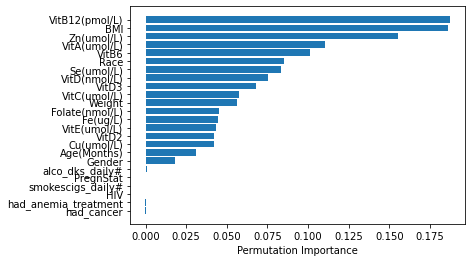

In [31]:
perm_importance = permutation_importance(gini_model, X_test, y_test)

feature_names = ['Gender',
                'Age(Months)',
                'Race',
                'PregnStat',
                'HIV',
                'alco_dks_daily#',
                'smokescigs_daily#',
                'had_anemia_treatment',
                'had_cancer',
                'Cu(umol/L)',
                'Se(umol/L)',
                'Zn(umol/L)',
                'Fe(ug/L)',
                'Folate(nmol/L)',
                'VitB12(pmol/L)',
                'VitB6',
                'VitD2',
                'VitD3',
                'VitD(nmol/L)',
                'VitC(umol/L)',
                'VitE(umol/L)',
                'VitA(umol/L)',
                'Weight',
                'BMI']
                
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

The Gini impurity model shows similar trend of relative importance of the Nutrients with highest relative importance being Vitamin B12 and Zinc followed by Vitamins A and B6 are next on the scale of importance. BMI scores second highest in this case.

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Decision Tree Model 3: Entropy model - max depth 10

To see if we can get comparable results from a decision tree when we limit maximum depth, we computed model 3 with maximum depth 10. Limiting max-depth could help avoid overfitting. However there is also risk that we may not get accurate data due to underfitting. While the accuracy, recall and precision metrics are important, the information of interest is the relative feature importance of the nutrients.

In [35]:
# Made a model as before, but call it entr_model2, and make the max_depth parameter equal to 10. 

entr_model2 = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 10, random_state = 1234)
entr_model2.fit(X_train, y_train)
y_pred = entr_model2.predict(X_test)
y_pred = pd.Series(y_pred)
entr_model2

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=1234)

In [36]:
print("Model Entropy model max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "1"' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Precision score for "2"' , metrics.precision_score(y_test,y_pred, pos_label = 2))
print('Recall score for "1"' , metrics.recall_score(y_test,y_pred, pos_label = 1))
print('Recall score for "2"' , metrics.recall_score(y_test,y_pred, pos_label = 2))

Model Entropy model max depth 3
Accuracy: 0.821294766950006
Balanced accuracy: 0.819808381537207
Precision score for "1" 0.8798153125215354
Precision score for "2" 0.738944918541505
Recall score for "1" 0.8258619574357979
Recall score for "2" 0.813754805638616


Limiting the maximum depth to 10 reduces the accuracy score and the other metrics significantly.

Text(0.5, 0, 'Permutation Importance')

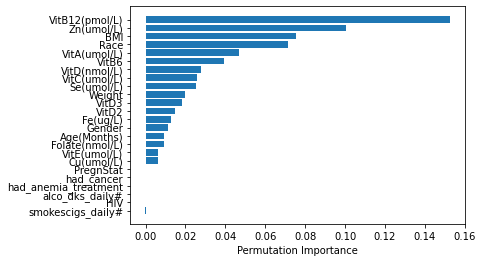

In [37]:
perm_importance = permutation_importance(entr_model2, X_test, y_test)

feature_names = ['Gender',
                'Age(Months)',
                'Race',
                'PregnStat',
                'HIV',
                'alco_dks_daily#',
                'smokescigs_daily#',
                'had_anemia_treatment',
                'had_cancer',
                'Cu(umol/L)',
                'Se(umol/L)',
                'Zn(umol/L)',
                'Fe(ug/L)',
                'Folate(nmol/L)',
                'VitB12(pmol/L)',
                'VitB6',
                'VitD2',
                'VitD3',
                'VitD(nmol/L)',
                'VitC(umol/L)',
                'VitE(umol/L)',
                'VitA(umol/L)',
                'Weight',
                'BMI']
                
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

Although this model has relatively lower accuracy it appears the trend of relative importance of the nutrients is the same as for the other two models. Limiting maximum depth to 10 does not alter the feature importance in this case.

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Random Forest models

Random Forest classifier models is an ensemble method tha averages multiple decission trees. We want to see if RF classifier could be better at modeling the data than the decision trees

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

## Random Forest model 1: max depth 10

The first RF model has maximum depth 10 and the default 100 decision trees (n_estimators = 100). Gini impurity is the default method used.

In [41]:
#First model max depth 10
firstRFModel = RandomForestClassifier(max_depth= 10, random_state= 1234)
firstRFModel.fit(X_train, y_train)

y_pred = firstRFModel.predict(X_test)
y_pred = pd.Series(y_pred)
firstRFModel

RandomForestClassifier(max_depth=10, random_state=1234)

In [42]:
print("Random Forest  model - max depth 10")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "1"' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Precision score for "2"' , metrics.precision_score(y_test,y_pred, pos_label = 2))
print('Recall score for "1"' , metrics.recall_score(y_test,y_pred, pos_label = 1))
print('Recall score for "2"' , metrics.recall_score(y_test,y_pred, pos_label = 2))

Random Forest  model - max depth 10
Accuracy: 0.8688313257865689
Balanced accuracy: 0.8633001000925158
Precision score for "1" 0.9018109976950939
Precision score for "2" 0.8168707200664038
Recall score for "1" 0.8858270263277055
Recall score for "2" 0.840773173857326


The metrics for this RF model are higher than that of the Decision Tree classifier with the same maximum depth. However, the model does not perform as good as the Decision Tree classifier models with no maximum depth.

Text(0.5, 0, 'Permutation Importance')

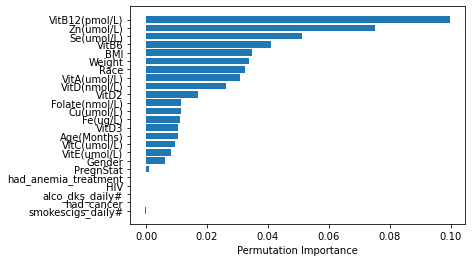

In [43]:
perm_importance = permutation_importance(firstRFModel, X_test, y_test)

feature_names = ['Gender',
                'Age(Months)',
                'Race',
                'PregnStat',
                'HIV',
                'alco_dks_daily#',
                'smokescigs_daily#',
                'had_anemia_treatment',
                'had_cancer',
                'Cu(umol/L)',
                'Se(umol/L)',
                'Zn(umol/L)',
                'Fe(ug/L)',
                'Folate(nmol/L)',
                'VitB12(pmol/L)',
                'VitB6',
                'VitD2',
                'VitD3',
                'VitD(nmol/L)',
                'VitC(umol/L)',
                'VitE(umol/L)',
                'VitA(umol/L)',
                'Weight',
                'BMI']
                
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

The feature importance permutation results indicate that Vitamin B12 and Zinc have the highest relative importance compared to the other nutrient features. This is consistent with the results of the computed feature importances from the Decision tree models. Interestingly selinium shows higher feature importance than  in the previous models.

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Random Forest model 2: no max depth

RF model with no maximum depth and default parameters, criterion: 'gini', n-estimators: 100

In [45]:
# Second model no max_depth and default params
secondRFModel = RandomForestClassifier( random_state= 1234)
secondRFModel.fit(X_train, y_train)

y_pred = secondRFModel.predict(X_test)
y_pred = pd.Series(y_pred)
secondRFModel

RandomForestClassifier(random_state=1234)

In [46]:
print("Random Forest  model - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "1"' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Precision score for "2"' , metrics.precision_score(y_test,y_pred, pos_label = 2))
print('Recall score for "1"' , metrics.recall_score(y_test,y_pred, pos_label = 1))
print('Recall score for "2"' , metrics.recall_score(y_test,y_pred, pos_label = 2))

Random Forest  model - no max depth
Accuracy: 0.9350199411835798
Balanced accuracy: 0.930903640913271
Precision score for "1" 0.9479746343988611
Precision score for "2" 0.9136514035649482
Recall score for "1" 0.947668025098648
Recall score for "2" 0.9141392567278941


RF classifier with no maximum depth shows the best accuracy compared to the previous models. 

Text(0.5, 0, 'Permutation Importance')

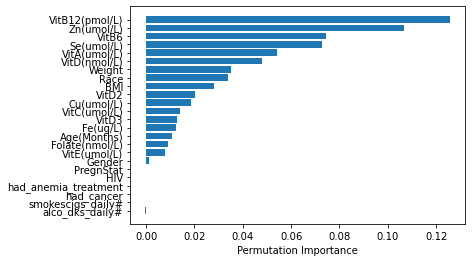

In [47]:
perm_importance = permutation_importance(secondRFModel, X_test, y_test)

feature_names = ['Gender',
                'Age(Months)',
                'Race',
                'PregnStat',
                'HIV',
                'alco_dks_daily#',
                'smokescigs_daily#',
                'had_anemia_treatment',
                'had_cancer',
                'Cu(umol/L)',
                'Se(umol/L)',
                'Zn(umol/L)',
                'Fe(ug/L)',
                'Folate(nmol/L)',
                'VitB12(pmol/L)',
                'VitB6',
                'VitD2',
                'VitD3',
                'VitD(nmol/L)',
                'VitC(umol/L)',
                'VitE(umol/L)',
                'VitA(umol/L)',
                'Weight',
                'BMI']
                
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

The computed feature importance reults are similar with a slightly different order to the previous model. Vitamin B12 and Zinc are the most important features followed by Vitamin B6 and Selenium.

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## RandomForest Gridsearch

In [40]:
rfc = RandomForestClassifier(random_state= 1234)

grid_params = {
    'n_estimators': [10, 100, 150, 200, 250, 300, 350],
    'max_depth': [5, 10, 15, 20, 25, 30],
    'criterion' :['gini', 'entropy']
}

rf_grid_cv = GridSearchCV(estimator=rfc, param_grid=grid_params, cv=5, verbose=3)

%time rf_grid_cv.fit(X_train, y_train)

print(rf_grid_cv.best_params_)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV 1/5] END criterion=gini, max_depth=5, n_estimators=10;, score=0.746 total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=5, n_estimators=10;, score=0.743 total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=5, n_estimators=10;, score=0.752 total time=   0.5s
[CV 4/5] END criterion=gini, max_depth=5, n_estimators=10;, score=0.748 total time=   0.5s
[CV 5/5] END criterion=gini, max_depth=5, n_estimators=10;, score=0.744 total time=   0.5s
[CV 1/5] END criterion=gini, max_depth=5, n_estimators=100;, score=0.758 total time=   4.8s
[CV 2/5] END criterion=gini, max_depth=5, n_estimators=100;, score=0.759 total time=   4.6s
[CV 3/5] END criterion=gini, max_depth=5, n_estimators=100;, score=0.759 total time=   4.9s
[CV 4/5] END criterion=gini, max_depth=5, n_estimators=100;, score=0.761 total time=   4.6s
[CV 5/5] END criterion=gini, max_depth=5, n_estimators=100;, score=0.765 total time=   4.9s
[CV 1/5] END criterion=

[CV 4/5] END criterion=gini, max_depth=15, n_estimators=200;, score=0.912 total time=  20.6s
[CV 5/5] END criterion=gini, max_depth=15, n_estimators=200;, score=0.916 total time=  20.6s
[CV 1/5] END criterion=gini, max_depth=15, n_estimators=250;, score=0.915 total time=  25.5s
[CV 2/5] END criterion=gini, max_depth=15, n_estimators=250;, score=0.910 total time=  25.7s
[CV 3/5] END criterion=gini, max_depth=15, n_estimators=250;, score=0.910 total time=  26.0s
[CV 4/5] END criterion=gini, max_depth=15, n_estimators=250;, score=0.912 total time=  39.8s
[CV 5/5] END criterion=gini, max_depth=15, n_estimators=250;, score=0.915 total time=  25.7s
[CV 1/5] END criterion=gini, max_depth=15, n_estimators=300;, score=0.914 total time=42.8min
[CV 2/5] END criterion=gini, max_depth=15, n_estimators=300;, score=0.909 total time=23.8min
[CV 3/5] END criterion=gini, max_depth=15, n_estimators=300;, score=0.911 total time=  59.5s
[CV 4/5] END criterion=gini, max_depth=15, n_estimators=300;, score=0.

[CV 3/5] END criterion=gini, max_depth=30, n_estimators=10;, score=0.913 total time=   1.4s
[CV 4/5] END criterion=gini, max_depth=30, n_estimators=10;, score=0.914 total time=   1.2s
[CV 5/5] END criterion=gini, max_depth=30, n_estimators=10;, score=0.913 total time=   1.2s
[CV 1/5] END criterion=gini, max_depth=30, n_estimators=100;, score=0.932 total time=  11.7s
[CV 2/5] END criterion=gini, max_depth=30, n_estimators=100;, score=0.930 total time=  11.5s
[CV 3/5] END criterion=gini, max_depth=30, n_estimators=100;, score=0.928 total time=  11.6s
[CV 4/5] END criterion=gini, max_depth=30, n_estimators=100;, score=0.931 total time=  11.8s
[CV 5/5] END criterion=gini, max_depth=30, n_estimators=100;, score=0.930 total time=  11.7s
[CV 1/5] END criterion=gini, max_depth=30, n_estimators=150;, score=0.934 total time=  17.8s
[CV 2/5] END criterion=gini, max_depth=30, n_estimators=150;, score=0.930 total time=  17.5s
[CV 3/5] END criterion=gini, max_depth=30, n_estimators=150;, score=0.929

[CV 5/5] END criterion=entropy, max_depth=10, n_estimators=200;, score=0.859 total time=  22.3s
[CV 1/5] END criterion=entropy, max_depth=10, n_estimators=250;, score=0.861 total time=  27.8s
[CV 2/5] END criterion=entropy, max_depth=10, n_estimators=250;, score=0.855 total time=  27.5s
[CV 3/5] END criterion=entropy, max_depth=10, n_estimators=250;, score=0.858 total time=  27.7s
[CV 4/5] END criterion=entropy, max_depth=10, n_estimators=250;, score=0.858 total time=  27.7s
[CV 5/5] END criterion=entropy, max_depth=10, n_estimators=250;, score=0.859 total time=  27.9s
[CV 1/5] END criterion=entropy, max_depth=10, n_estimators=300;, score=0.861 total time=  33.2s
[CV 2/5] END criterion=entropy, max_depth=10, n_estimators=300;, score=0.855 total time=  33.3s
[CV 3/5] END criterion=entropy, max_depth=10, n_estimators=300;, score=0.857 total time=  33.3s
[CV 4/5] END criterion=entropy, max_depth=10, n_estimators=300;, score=0.858 total time=  33.3s
[CV 5/5] END criterion=entropy, max_dept

[CV 1/5] END criterion=entropy, max_depth=25, n_estimators=10;, score=0.918 total time=   1.8s
[CV 2/5] END criterion=entropy, max_depth=25, n_estimators=10;, score=0.914 total time=   1.6s
[CV 3/5] END criterion=entropy, max_depth=25, n_estimators=10;, score=0.914 total time= 7.6min
[CV 4/5] END criterion=entropy, max_depth=25, n_estimators=10;, score=0.915 total time=   6.9s
[CV 5/5] END criterion=entropy, max_depth=25, n_estimators=10;, score=0.918 total time=   4.6s
[CV 1/5] END criterion=entropy, max_depth=25, n_estimators=100;, score=0.933 total time=  17.2s
[CV 2/5] END criterion=entropy, max_depth=25, n_estimators=100;, score=0.929 total time=  17.2s
[CV 3/5] END criterion=entropy, max_depth=25, n_estimators=100;, score=0.928 total time=  16.6s
[CV 4/5] END criterion=entropy, max_depth=25, n_estimators=100;, score=0.931 total time=  16.1s
[CV 5/5] END criterion=entropy, max_depth=25, n_estimators=100;, score=0.932 total time=  16.4s
[CV 1/5] END criterion=entropy, max_depth=25,

The best parameters 'criterion': 'entropy', 'max_depth': 30, 'n_estimators': 350.

In [48]:

X = NHANES_final_df[['Gender',
        'Age(Months)',
        'Race',
        'PregnStat',
        'HIV',
        'alco_dks_daily#',
        'smokescigs_daily#',
        'had_anemia_treatment',
        'had_cancer',
        'Cu(umol/L)',
        'Se(umol/L)',
        'Zn(umol/L)',
        'Fe(ug/L)',
        'Folate(nmol/L)',
        'VitB12(pmol/L)',
        'VitB6',
        'VitD2',
        'VitD3',
        'VitD(nmol/L)',
        'VitC(umol/L)',
        'VitE(umol/L)',
        'VitA(umol/L)',
        'Weight',
        'BMI']]

y = NHANES_final_df['immunity_strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
best_model = RandomForestClassifier(criterion = 'entropy', n_estimators=350, max_depth=30, random_state= 1234)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
y_pred = pd.Series(y_pred)
best_model

RandomForestClassifier(criterion='entropy', max_depth=30, n_estimators=350,
                       random_state=1234)

In [50]:
print("Random Forest  model bestestimator")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "1"' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Precision score for "2"' , metrics.precision_score(y_test,y_pred, pos_label = 2))
print('Recall score for "1"' , metrics.recall_score(y_test,y_pred, pos_label = 1))
print('Recall score for "2"' , metrics.recall_score(y_test,y_pred, pos_label = 2))


Random Forest  model bestestimator
Accuracy: 0.9377996213189381
Balanced accuracy: 0.9349669064405084
Precision score for "1" 0.9532868590787673
Precision score for "2" 0.9127084652733798
Recall score for "1" 0.9465036548289023
Recall score for "2" 0.9234301580521145


## Feature importance based on feature permutation

Text(0.5, 0, 'Permutation Importance')

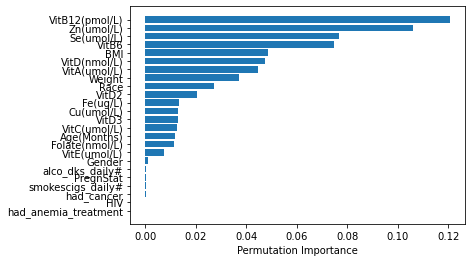

In [72]:

perm_importance = permutation_importance(best_model, X_test, y_test)

feature_names = ['Gender',
                'Age(Months)',
                'Race',
                'PregnStat',
                'HIV',
                'alco_dks_daily#',
                'smokescigs_daily#',
                'had_anemia_treatment',
                'had_cancer',
                'Cu(umol/L)',
                'Se(umol/L)',
                'Zn(umol/L)',
                'Fe(ug/L)',
                'Folate(nmol/L)',
                'VitB12(pmol/L)',
                'VitB6',
                'VitD2',
                'VitD3',
                'VitD(nmol/L)',
                'VitC(umol/L)',
                'VitE(umol/L)',
                'VitA(umol/L)',
                'Weight',
                'BMI']
                
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")


As observed in the previous models. The computed feature importance with the best model, using permutation method, show that Vitamin B12 and Zinc are the most important features followed by Selenium and Vitamin B6. 

## Feature importance based on mean decrease in impurity (MDI)

The feature importance permutation method was used for all the previous method to rank the model features according to their weighted importance. The oerseved trends were similar for all the models with the same nutrients in the Top 4. For validation we want to compute feature importances using a different method that computes the  feature importances using the `feature_importances_` attribute, an in-built Random Forest algorithm method. 

Text(0.5, 0, 'MDI Importance')

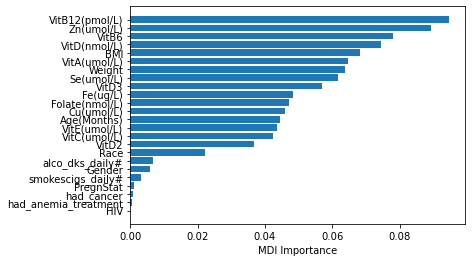

In [58]:
importances = best_model.feature_importances_
forest_importances = pd.Series(importances, index=features)

sorted_idx = forest_importances.argsort()
plt.barh(features[sorted_idx], forest_importances[sorted_idx])
plt.xlabel("MDI Importance")

The feature importance computed by MDI method showa the same three features Vitamin B12, Zinc ans Vitamin B in the top 4 list as observed with the permutation method. Although the there is some desparity in the relative importances the general trend appears to be similar, with categorical variables at the bottom of the list. It is however important to highlight that impurity-based feature importances are prone to bias as they can be biased toward high cardinality features.

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

### Conclusion

All the models and computed features importances consistently show that Vitamin B12 and  Zn are the most important features. Vitaim B6 is also a high ranking important feature feature as it was consistently in the top 4 features in all the models. Selinium appears to be an important feature although the computed feature importance using MDI method shows some discrepancy. Permutation feature importance does not have the same bias limitations of the impurity-based feature importance which is biased toward high-cardinality features. For the purposes of this project we will use the raking from the permutation method to score food items in the USDA Nutrition dataset.